<a href="https://colab.research.google.com/github/sangjinsu/recommendation-system/blob/main/1_movies.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [95]:
import pandas as pd

In [96]:
pd.__version__

'1.1.5'

# Read Data

In [97]:
movies = pd.read_csv('/content/drive/MyDrive/추천 시스템 입문반/data/ml-latest-small/movies.csv', index_col='movieId')

In [98]:
movies.shape

(9742, 2)

In [99]:
movies.head()

,title,genres
movieId,,
1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
2,Jumanji (1995),Adventure|Children|Fantasy
3,Grumpier Old Men (1995),Comedy|Romance
4,Waiting to Exhale (1995),Comedy|Drama|Romance
5,Father of the Bride Part II (1995),Comedy


In [100]:
movies.tail()

,title,genres
movieId,,
193581,Black Butler: Book of the Atlantic (2017),Action|Animation|Comedy|Fantasy
193583,No Game No Life: Zero (2017),Animation|Comedy|Fantasy
193585,Flint (2017),Drama
193587,Bungo Stray Dogs: Dead Apple (2018),Action|Animation
193609,Andrew Dice Clay: Dice Rules (1991),Comedy


In [101]:
movies.columns

Index(['title', 'genres'], dtype='object')

# Save Data

In [102]:
movies.to_csv('/content/drive/MyDrive/추천 시스템 입문반/data/ml-latest-small/save_test.csv')

# 개봉연도 데이터 정제하기 (데이터 전처리 preprocessing)

In [103]:
movies['year'] = movies['title'].str.extract('(\(\d\d\d\d\))')

In [104]:
movies['year'] = movies['year'].str.extract('(\d\d\d\d)')

In [105]:
movies['year'].unique()

array(['1995', '1994', '1996', '1976', '1992', '1967', '1993', '1964',
       '1977', '1965', '1982', '1990', '1991', '1989', '1937', '1940',
       '1969', '1981', '1973', '1970', '1955', '1959', '1968', '1988',
       '1997', '1972', '1943', '1952', '1951', '1957', '1961', '1958',
       '1954', '1934', '1944', '1960', '1963', '1942', '1941', '1953',
       '1939', '1950', '1946', '1945', '1938', '1947', '1935', '1936',
       '1956', '1949', '1932', '1975', '1974', '1971', '1979', '1987',
       '1986', '1980', '1978', '1985', '1966', '1962', '1983', '1984',
       '1948', '1933', '1931', '1922', '1998', '1929', '1930', '1927',
       '1928', '1999', '2000', '1926', '1919', '1921', '1925', '1923',
       '2001', '2002', '2003', '1920', '1915', '1924', '2004', '1916',
       '1917', '2005', '2006', '1902', nan, '1903', '2007', '2008',
       '2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016',
       '2017', '2018', '1908'], dtype=object)

### 결측값 핸들링하기

In [106]:
movies[movies['year'].isnull()]

,title,genres,year
movieId,,,
40697,Babylon 5,Sci-Fi,NaN
140956,Ready Player One,Action|Sci-Fi|Thriller,NaN
143410,Hyena Road,(no genres listed),NaN
147250,The Adventures of Sherlock Holmes and Doctor W...,(no genres listed),NaN
149334,Nocturnal Animals,Drama|Thriller,NaN
156605,Paterson,(no genres listed),NaN
162414,Moonlight,Drama,NaN
167570,The OA,(no genres listed),NaN
171495,Cosmos,(no genres listed),NaN


In [107]:
movies['year'] = movies['year'].fillna('2050')

In [108]:
movies['year'].unique()

array(['1995', '1994', '1996', '1976', '1992', '1967', '1993', '1964',
       '1977', '1965', '1982', '1990', '1991', '1989', '1937', '1940',
       '1969', '1981', '1973', '1970', '1955', '1959', '1968', '1988',
       '1997', '1972', '1943', '1952', '1951', '1957', '1961', '1958',
       '1954', '1934', '1944', '1960', '1963', '1942', '1941', '1953',
       '1939', '1950', '1946', '1945', '1938', '1947', '1935', '1936',
       '1956', '1949', '1932', '1975', '1974', '1971', '1979', '1987',
       '1986', '1980', '1978', '1985', '1966', '1962', '1983', '1984',
       '1948', '1933', '1931', '1922', '1998', '1929', '1930', '1927',
       '1928', '1999', '2000', '1926', '1919', '1921', '1925', '1923',
       '2001', '2002', '2003', '1920', '1915', '1924', '2004', '1916',
       '1917', '2005', '2006', '1902', '2050', '1903', '2007', '2008',
       '2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016',
       '2017', '2018', '1908'], dtype=object)

### 데이터에 가장 많이 출현하는 개봉연도를 찾아주세요.

In [109]:
movies['year'].value_counts()

2002    311
2006    295
2001    294
2007    284
2000    283
       ... 
1903      1
1922      1
1917      1
1902      1
1908      1
Name: year, Length: 107, dtype: int64

In [110]:
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt

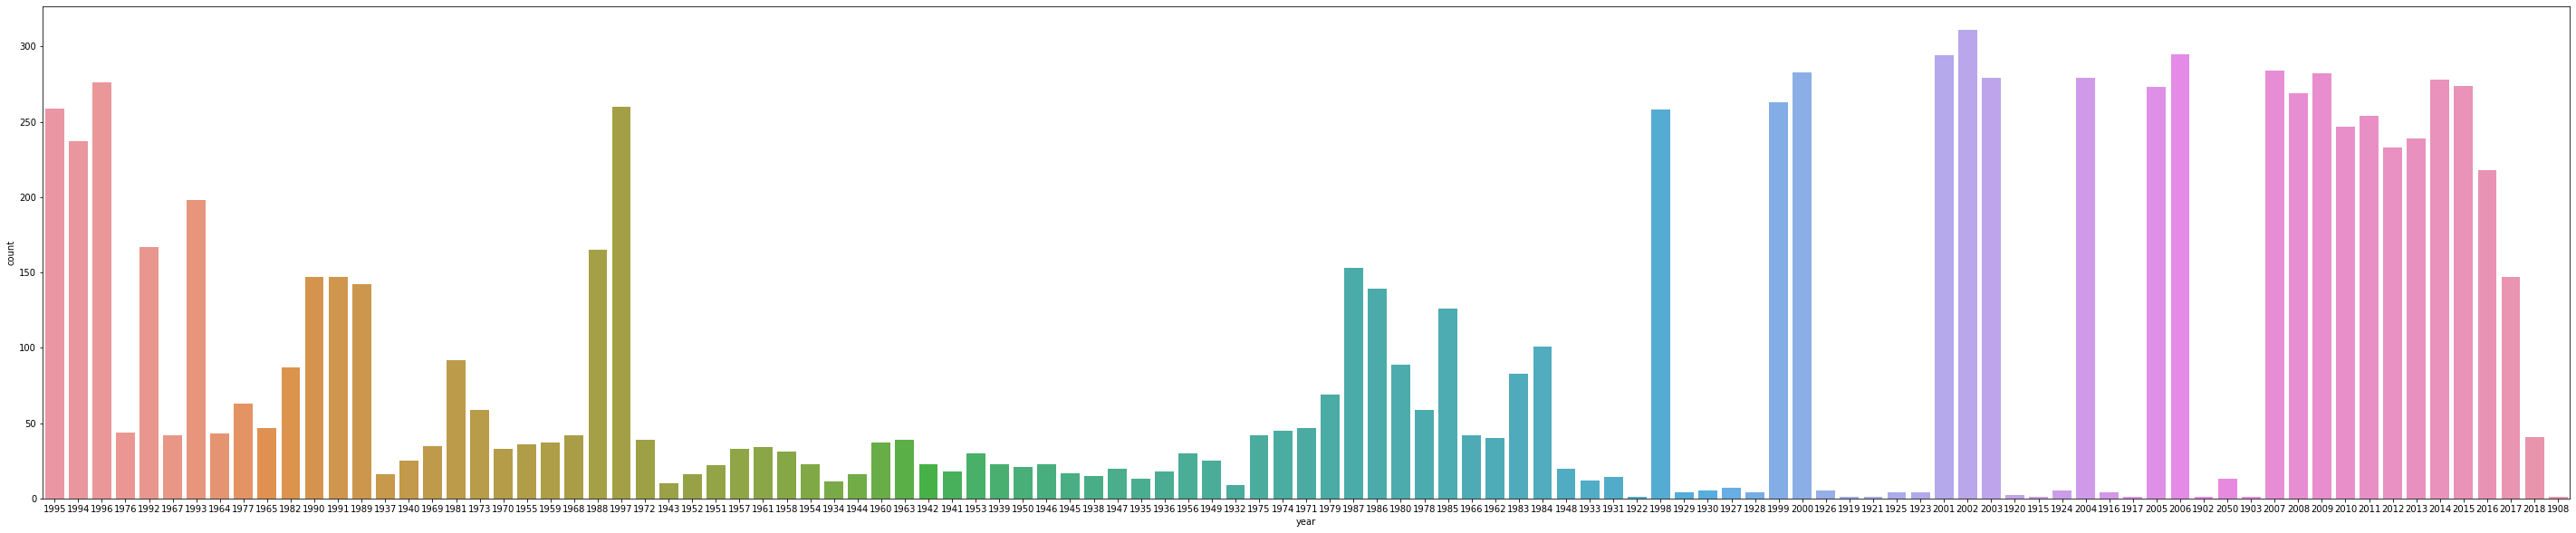

In [111]:
plt.figure(figsize=(50, 10))
sns.countplot(data=movies, x='year')

### genres 분석

In [112]:
genres_list = list(movies['genres'].apply(lambda x: x.split('|')))

In [113]:
genres_list[:3]

[['Adventure', 'Animation', 'Children', 'Comedy', 'Fantasy'],
 ['Adventure', 'Children', 'Fantasy'],
 ['Comedy', 'Romance']]

In [114]:
flat_list = []
for sublist in genres_list:
  for item in sublist:
    flat_list.append(item)

In [115]:
genres_unique = list(set(flat_list))

In [116]:
genres_unique

['Animation',
 'Western',
 'Drama',
 'Comedy',
 'Romance',
 '(no genres listed)',
 'Musical',
 'Sci-Fi',
 'War',
 'Action',
 'Thriller',
 'Crime',
 'Fantasy',
 'Mystery',
 'Film-Noir',
 'Documentary',
 'Children',
 'IMAX',
 'Adventure',
 'Horror']

In [117]:
len(genres_unique)

20

### 장르 데이터 숫자형으로 변환하기

In [118]:
sample_genre = genres_unique[0]

In [119]:
sample_genre

'Animation'

In [120]:
movies['Adventure'] = movies['genres'].apply(lambda x : 'Adventure' in x)

In [121]:
genres_dummies = movies['genres'].str.get_dummies(sep='|')

In [122]:
genres_dummies.to_pickle('/content/drive/MyDrive/추천 시스템 입문반/data/ml-latest-small/genres.p')

In [123]:
genres_dummies.corr()

,(no genres listed),Action,Adventure,Animation,Children,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
(no genres listed),1.000000,-0.028442,-0.022840,-0.015309,-0.016005,-0.046878,-0.022171,-0.012871,-0.053277,-0.017447,-0.005618,-0.019769,-0.007599,-0.011151,-0.014794,-0.026195,-0.019792,-0.029073,-0.011956,-0.007816
Action,-0.028442,1.000000,0.291949,0.029659,-0.049652,-0.148968,0.154471,-0.099463,-0.152964,0.059931,-0.031649,-0.035443,0.131864,-0.083331,-0.028515,-0.146670,0.233475,0.199042,0.076289,0.021600
Adventure,-0.022840,0.291949,1.000000,0.211472,0.273931,-0.055215,-0.085988,-0.075111,-0.156327,0.262511,-0.030140,-0.098423,0.143982,-0.005544,-0.048427,-0.072584,0.181797,-0.035942,0.010195,0.036136
Animation,-0.015309,0.029659,0.211472,1.000000,0.437376,0.029079,-0.069847,-0.050144,-0.160504,0.196895,-0.015555,-0.062464,0.080744,0.111804,-0.030477,-0.061882,0.064093,-0.107822,-0.036990,-0.024378
Children,-0.016005,-0.049652,0.273931,0.437376,1.000000,0.088701,-0.086442,-0.056859,-0.160742,0.234117,-0.025673,-0.083569,0.062011,0.137072,-0.036449,-0.070189,-0.011910,-0.127716,-0.048341,-0.016890
Comedy,-0.046878,-0.148968,-0.055215,0.029079,0.088701,1.000000,-0.075282,-0.131657,-0.283472,-0.005708,-0.070710,-0.133382,-0.056627,0.045466,-0.127209,0.153088,-0.132400,-0.286289,-0.095919,-0.039622
Crime,-0.022171,0.154471,-0.085988,-0.069847,-0.086442,-0.075282,1.000000,-0.073955,0.063005,-0.086254,0.137141,-0.063805,-0.020892,-0.056850,0.124138,-0.097444,-0.095166,0.265196,-0.059585,-0.022997
Documentary,-0.012871,-0.099463,-0.075111,-0.050144,-0.056859,-0.131657,-0.073955,1.000000,-0.173925,-0.060473,-0.020645,-0.069364,0.003381,-0.005664,-0.050168,-0.093597,-0.072736,-0.104346,-0.013378,-0.024915
Drama,-0.053277,-0.152964,-0.156327,-0.160504,-0.160742,-0.283472,0.063005,-0.173925,1.000000,-0.106337,0.024256,-0.187391,-0.063293,-0.038022,0.027635,0.122454,-0.158325,-0.008267,0.135067,-0.025060
Fantasy,-0.017447,0.059931,0.262511,0.196895,0.234117,-0.005708,-0.086254,-0.060473,-0.106337,1.000000,-0.023962,0.012336,0.102962,0.050524,0.014768,-0.000635,0.046094,-0.057807,-0.043959,-0.021441


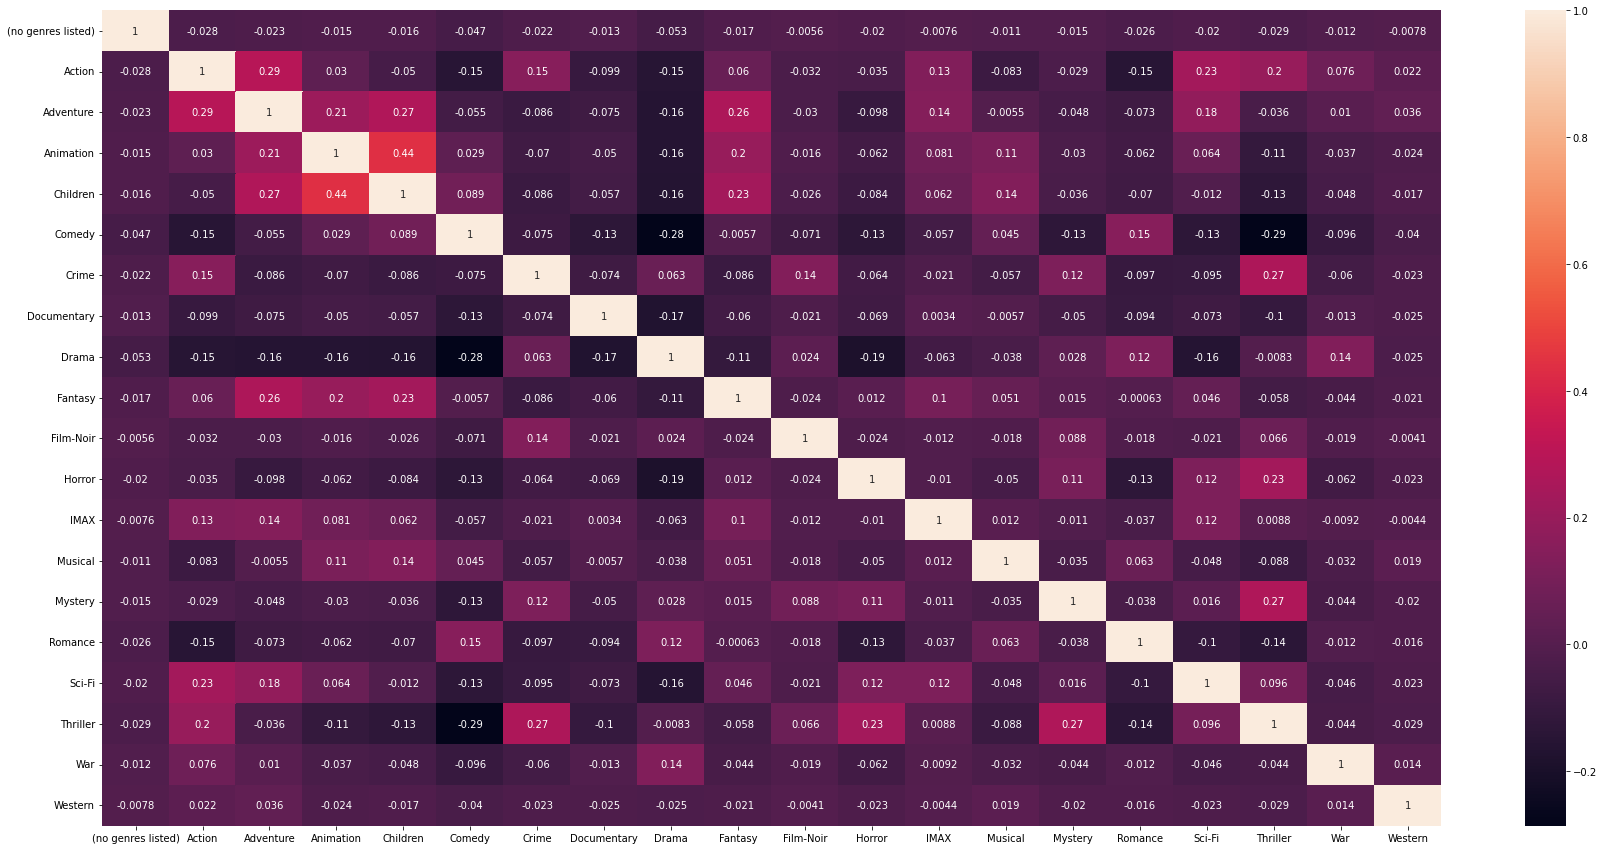

In [124]:
plt.figure(figsize=(30, 15))
sns.heatmap(genres_dummies.corr(), annot=True)

### 기초 통계 rating

In [125]:
ratings = pd.read_csv('/content/drive/MyDrive/추천 시스템 입문반/data/ml-latest-small/ratings.csv')

In [126]:
ratings.sample()

,userId,movieId,rating,timestamp
2144,18,72011,3.5,1455749223


In [127]:
ratings.shape

(100836, 4)

In [128]:
print(len(ratings['userId'].unique()))
print(len(ratings['movieId'].unique()))

610
9724


In [129]:
ratings['rating'].describe()

count    100836.000000
mean          3.501557
std           1.042529
min           0.500000
25%           3.000000
50%           3.500000
75%           4.000000
max           5.000000
Name: rating, dtype: float64

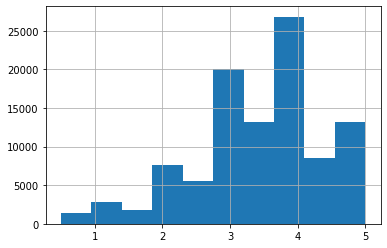

In [130]:
ratings['rating'].hist()

### 사람들은 평균적으로 몇 개의 영화에 대해서 rating을 남겼는가?

In [131]:
users = ratings.groupby('userId')['movieId'].count()

In [132]:
users.describe()

count     610.000000
mean      165.304918
std       269.480584
min        20.000000
25%        35.000000
50%        70.500000
75%       168.000000
max      2698.000000
Name: movieId, dtype: float64

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


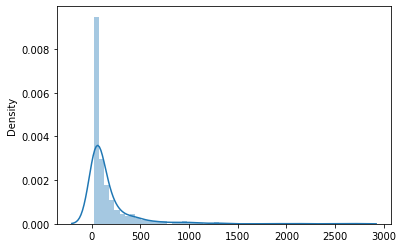

In [133]:
sns.distplot(users.values)

### 사람들이 많이 보는 영화는?



In [134]:
films = ratings.groupby('movieId')['userId'].count()
films[:5]

movieId
1    215
2    110
3     52
4      7
5     49
Name: userId, dtype: int64

In [135]:
films.describe()

count    9724.000000
mean       10.369807
std        22.401005
min         1.000000
25%         1.000000
50%         3.000000
75%         9.000000
max       329.000000
Name: userId, dtype: float64

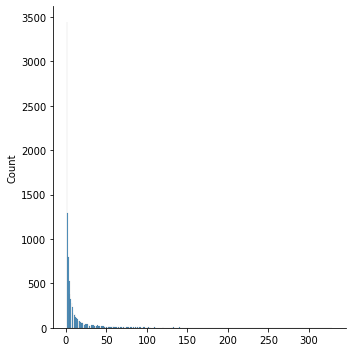

In [136]:
sns.displot(films.values)

### 유저별 평점 패턴 분석

In [137]:
films.sort_values(ascending=False)[:5]

movieId
356     329
318     317
296     307
593     279
2571    278
Name: userId, dtype: int64

In [142]:
movies = pd.read_csv('/content/drive/MyDrive/추천 시스템 입문반/data/ml-latest-small/movies.csv', index_col='movieId')

In [146]:
movies.loc[[365,318,452,1425]]

,title,genres
movieId,,
365,Little Buddha (1993),Drama
318,"Shawshank Redemption, The (1994)",Crime|Drama
452,Widows' Peak (1994),Drama
1425,Fierce Creatures (1997),Comedy


### 겨울왕국 평점보기

In [148]:
movies.loc[106696]

title                                         Frozen (2013)
genres    Adventure|Animation|Comedy|Fantasy|Musical|Rom...
Name: 106696, dtype: object

In [149]:
frozen = ratings[ratings['movieId'] == 106696]

In [150]:
len(frozen)

29

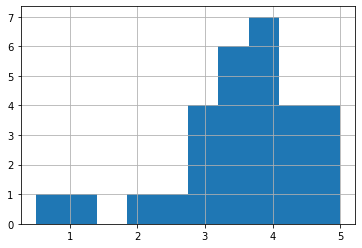

In [152]:
frozen['rating'].hist()

In [155]:
frozen

,userId,movieId,rating,timestamp
1245,10,106696,4.5,1455306204
3572,21,106696,4.0,1403460685
9418,63,106696,5.0,1443461176
16798,105,106696,3.5,1447563589
21852,141,106696,3.0,1513129988
21967,143,106696,4.0,1444768621
22567,153,106696,2.5,1525552648
23219,159,106696,3.0,1508640298
25783,177,106696,5.0,1435529765
35769,241,106696,4.0,1447540037


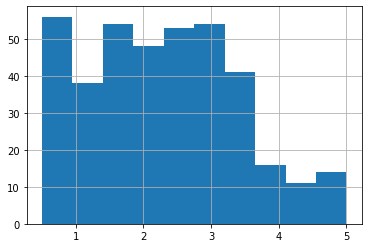

In [157]:
ratings.loc[ratings['userId'] == 567, 'rating'].hist()

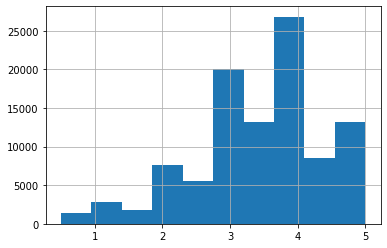

In [158]:
ratings['rating'].hist()

### timestamp 컬럼 처리

In [162]:
from datetime import datetime

In [163]:
datetime.fromtimestamp(1537158405)

datetime.datetime(2018, 9, 17, 4, 26, 45)

In [166]:
ratings['timestamp'] = ratings['timestamp'].apply(lambda x : datetime.fromtimestamp(x))

In [167]:
ratings.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,2000-07-30 18:45:03
1,1,3,4.0,2000-07-30 18:20:47
2,1,6,4.0,2000-07-30 18:37:04
3,1,47,5.0,2000-07-30 19:03:35
4,1,50,5.0,2000-07-30 18:48:51


In [168]:
ratings.to_pickle('/content/drive/MyDrive/추천 시스템 입문반/data/ml-latest-small/ratings_updated.p')